In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("franchises_combined_by_year.csv", index_col = 0)

In [4]:
df.sample()

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes
8793,Jack Ryan,f193,movie,tt0099810,the hunt for red october,1990,0,135,"['Action', 'Adventure', 'Thriller']",205888.0,7.5,5.0,1.0,NaN,NaN,NaN,NaN,1.28859,0.800876


This gets the first and last year of the franchise, creates columns and then gives the relative position of each release in the franchise as a percentage

In [5]:
df = df.groupby('franchise_id').agg(min_year=('year', 'min'), max_year=('year', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right') \
       .assign(position_in_franchise=lambda x: (x['year'] - x['min_year']) / (x['max_year'] - x['min_year']) * 100)


This gets the highest and lowest vote of the franchise and creates columns

In [6]:
df = df.groupby('franchise_id').agg(min_vote=('votes_average', 'min'), max_vote=('votes_average', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right')


This gets the highest and lowest rating of the franchise and creates columns

In [7]:
df = df.groupby('franchise_id').agg(min_rating=('rating_average', 'min'), max_rating=('rating_average', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right')


In [72]:
df.sample()

,franchise_id,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,...,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
6171,3025-668,5.8,8.2,6.0,77.0,1997,2003,Backyard Sports,game,tt0829103,...,7.3,6.0,1.0,2.0,-38.0,-0.9,0.0,0.185321,-0.242621,33.333333


In [105]:
df[df["max_vote"] == df["votes_average"]][df["franchise_name"]  == "Mario"]

<ipython-input-105-e425e81f3dc0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["max_vote"] == df["votes_average"]][df["franchise_name"]  == "Mario"]


,franchise_id,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
5,3025-1,3.0,8.9,13.0,6522.0,1978,2022,Mario,game,tt0177266,Super Mario Bros.,1985,0,NaN,"["" 'Pinball']"", "" 'Action'"", "" 'Adventure'"", ""...",6522.0,8.9,195.0,1.0,1.0,6472.5,3.05,-3.0,1.67139,2.50643,15.909091


<ipython-input-101-6bd7bf64d379>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["min_vote"] == df["votes_average"]][df["franchise_count"] >20].position_in_franchise.value_counts().sort_index().plot()


<AxesSubplot:>

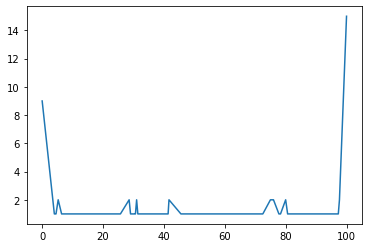

In [101]:
df[df["min_vote"] == df["votes_average"]][df["franchise_count"] >20].position_in_franchise.value_counts().sort_index().plot()

In [8]:
df.sample()

,franchise_id,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
8572,f1340,4.1,6.775,19.0,81773.0,1919,2008,Hopalong Cassidy (American-Western),movie,tt0010134,fool's gold,1919,0,\N,['Drama'],19.0,4.1,73.0,1.0,NaN,NaN,NaN,NaN,-1.661813,-0.331281,0.0


<AxesSubplot:xlabel='position_in_franchise', ylabel='rating_average'>

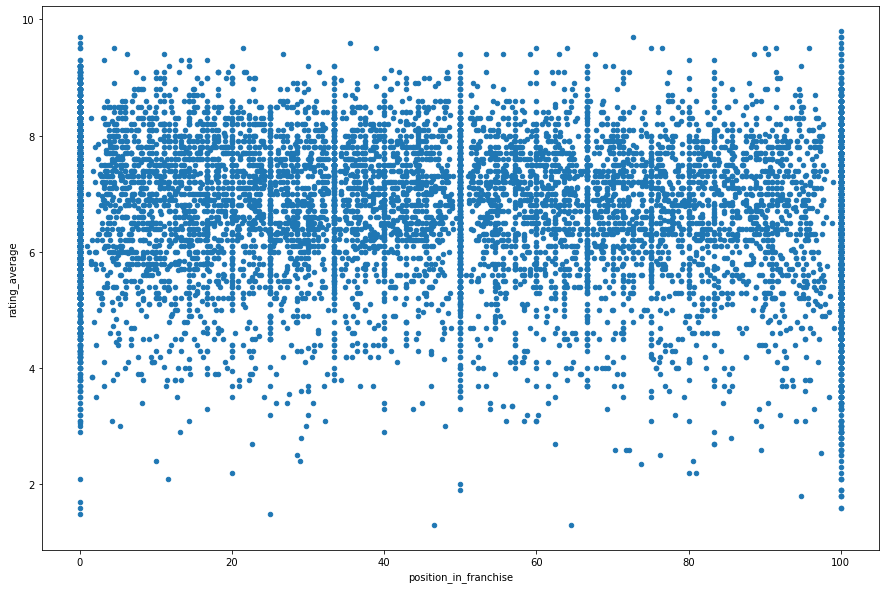

In [110]:
df.plot.scatter("position_in_franchise", "rating_average", figsize = (15,10))

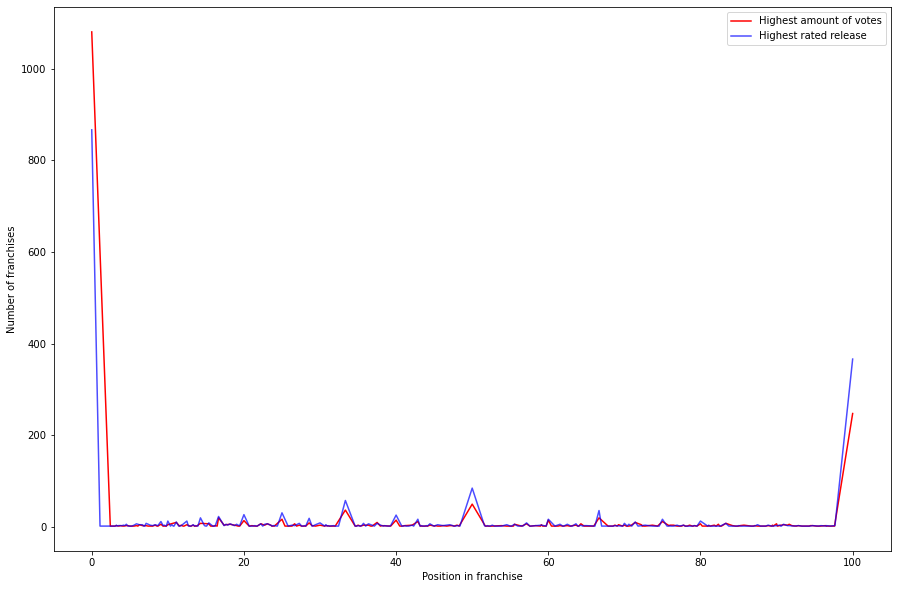

In [68]:
fig, ax = plt.subplots(figsize=(15, 10))

df[df["max_vote"] == df["votes_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel="Position in franchise", ylabel="Number of franchises", color="red", ax=ax, label = "Highest amount of votes")
df[df["max_rating"] == df["rating_average"]].position_in_franchise.value_counts().sort_index().plot(color="blue", alpha =0.7, ax=ax, label = "Highest rated release")
plt.legend()
plt.show()

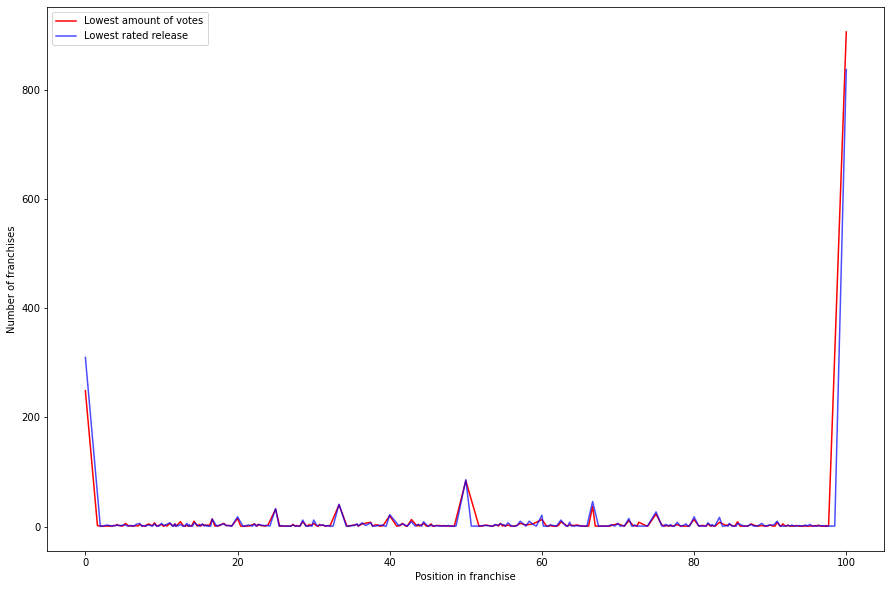

In [67]:
fig, ax = plt.subplots(figsize=(15, 10))
df[df["min_vote"] == df["votes_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel="Position in franchise", ylabel="Number of franchises", color="red", ax=ax, label = "Lowest amount of votes")
df[df["min_rating"] == df["rating_average"]].position_in_franchise.value_counts().sort_index().plot(color="blue", alpha =0.7, ax=ax, label = "Lowest rated release")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Position in franchise of lowest rated release', ylabel='Number of franchises'>

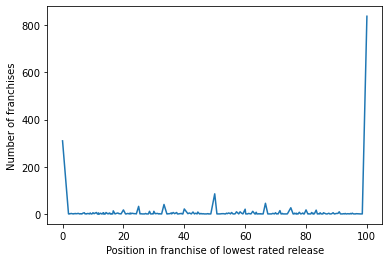

In [56]:
df[df["min_rating"] == df["rating_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel = "Position in franchise of lowest rated release", ylabel = "Number of franchises")

<AxesSubplot:xlabel='Position in franchise of lowest scoring release', ylabel='Number of franchises'>

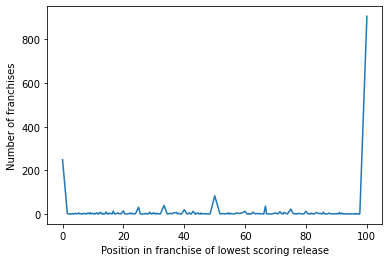

In [45]:
df[df["min_vote"] == df["votes_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel = "Position in franchise of release with least votes", ylabel = "Number of franchises")

In [32]:
df.sample()

,franchise_id,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,...,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
3921,3025-3709,68.5,96.0,1983,1987,Konamic,game,tt0186634,Track & Field,1983,...,6.6,3.0,1.0,NaN,NaN,NaN,NaN,-0.464834,-0.218451,0.0


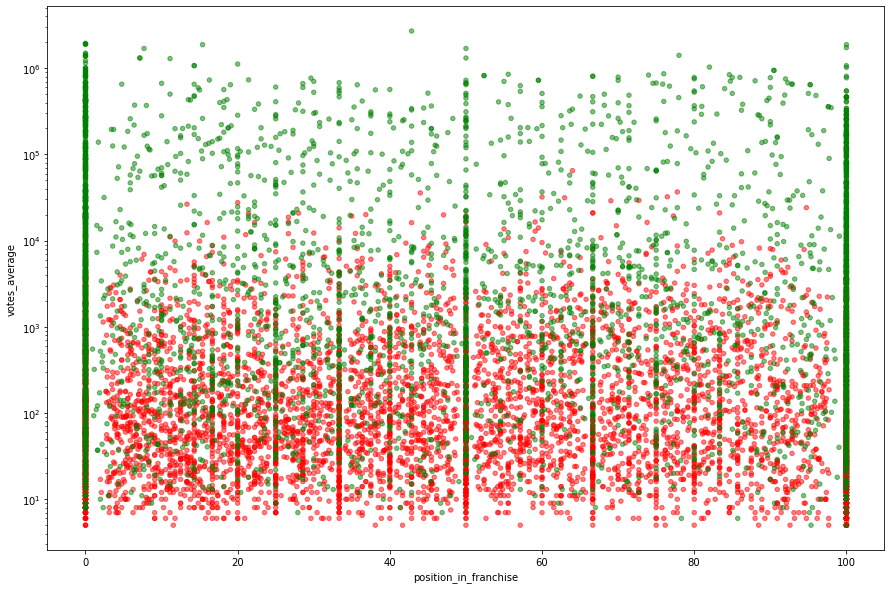

In [29]:
df.plot.scatter("position_in_franchise", "votes_average", c=df['type'].map({'movie': 'green', 'game': 'red'}), alpha = 0.5, figsize = (15,10))
plt.yscale('log', base=10)

In [9]:
df


,franchise_id,min,max,franchise_name,type,tconst,title,year,is_adult,runtime,...,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,percentage
0,3025-1,1978,2022,Mario,game,tt0315808,Baseball,1978,0,NaN,...,3.00,195.0,1.0,NaN,NaN,NaN,NaN,-3.808490,-0.253646,0.000000
1,3025-1,1978,2022,Mario,game,tt0176664,Donkey Kong,1981,0,NaN,...,7.40,195.0,1.0,3.0,1998.0,4.40,0.0,0.278200,0.593586,6.818182
2,3025-1,1978,2022,Mario,game,"tt0204287, tt3472820","Donkey Kong Junior, Donkey Kong",1982,0,NaN,...,6.50,195.0,2.0,1.0,-1840.5,-0.90,1.0,-0.557714,-0.186860,9.090909
3,3025-1,1978,2022,Mario,game,"tt0176971, tt0185909, tt0302501, tt2318635, tt...","Mario Bros., Baseball, Donkey Kong, Pinball, M...",1983,0,NaN,...,6.00,195.0,5.0,1.0,156.3,-0.50,3.0,-1.022110,-0.120583,11.363636
4,3025-1,1978,2022,Mario,game,"tt0185017, tt0186168, tt3404206, tt3410580","Wrecking Crew, Golf, Mario Bros. Special, Punc...",1984,0,NaN,...,5.85,195.0,4.0,1.0,-277.3,-0.15,-1.0,-1.161429,-0.238169,13.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,f993,1948,1952,Renato Castellani's Italian neorealism trilogy,movie,tt0040018,it's forever springtime,1950,0,92,...,6.40,3.0,1.0,2.0,-212.0,-0.50,0.0,0.334048,-0.330841,50.000000
11379,f993,1948,1952,Renato Castellani's Italian neorealism trilogy,movie,tt0044572,two cents worth of hope,1952,0,110,...,7.00,3.0,1.0,2.0,559.0,0.60,0.0,0.854707,-0.327767,100.000000
11380,f994,1974,1987,It's Alive,movie,"tt0071198, tt0071675","the bat people, it's alive",1974,0,93,...,4.25,4.0,2.0,NaN,NaN,NaN,NaN,-1.531648,-0.301416,0.000000
11381,f994,1974,1987,It's Alive,movie,tt0077756,it lives again,1978,0,91,...,5.20,4.0,1.0,4.0,-2955.5,0.95,-1.0,-0.707271,-0.317670,30.769231


We can get a count for the number of franchises in our dataset, and how many of these are games vs movies

In [5]:
print("Unique franchise ids: ", df.franchise_id.nunique(),
      "\nMovie franchises: ", df[df["type"]=="movie"].franchise_id.nunique(), 
      "\nGame franchises: ", df[df["type"]=="game"].franchise_id.nunique())

Unique franchise ids:  2014 
Movie franchises:  857 
Game franchises:  1157


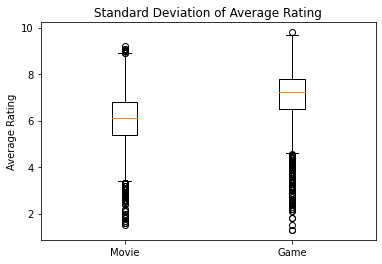

In [6]:
fig, ax = plt.subplots()
ax.boxplot([df[df['type'] == 'movie']['rating_average'], df[df['type'] == "game"]['rating_average']])
ax.set_xticklabels(['Movie', 'Game'])
ax.set_ylabel('Average Rating')
ax.set_title('Standard Deviation of Average Rating')
plt.show()

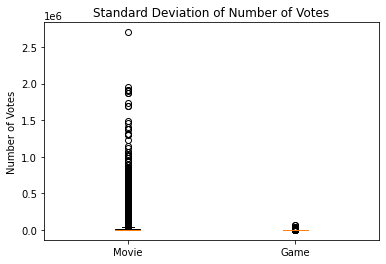

In [7]:
fig, ax = plt.subplots()
ax.boxplot([df[df['type'] == 'movie']['votes_average'], df[df['type'] == "game"]['votes_average']])
ax.set_xticklabels(['Movie', 'Game'])
ax.set_ylabel('Number of Votes')
ax.set_title('Standard Deviation of Number of Votes')
plt.show()

In [8]:
df[df['type'] == "game"]['votes_average'].describe()

count     7305.000000
mean       611.166027
std       2358.429140
min          5.000000
25%         27.000000
50%         80.000000
75%        320.000000
max      69750.000000
Name: votes_average, dtype: float64

In [9]:
df[df['type'] == "movie"]['votes_average'].describe()

count    4.078000e+03
mean     6.025842e+04
std      1.818602e+05
min      5.000000e+00
25%      2.670000e+02
50%      1.688000e+03
75%      1.844825e+04
max      2.700528e+06
Name: votes_average, dtype: float64

We can look at the number of releases each franchise has

In [10]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 12.5, 15.5, 20.5, 250]
df['franchise_count_bin'] = pd.cut(df['franchise_count'], bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10-12", "13-15", "16-20", "20+"])

<AxesSubplot:xlabel='Number of releases', ylabel='Number of franchises'>

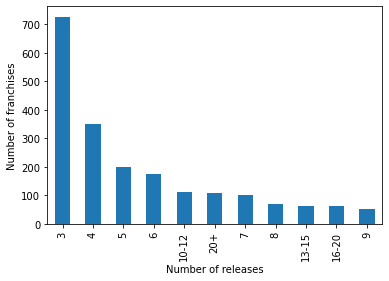

In [11]:
df.groupby('franchise_id')['franchise_count_bin'].first().value_counts().reset_index().plot(
    kind='bar', x='index', y='franchise_count_bin', xlabel = "Number of releases", ylabel = "Number of franchises", legend=False)

## Note:

This is taking me too long. All I want to do is sort the bins so they go in order but it's taking too long to try to figure out so I'll come back to it

Now I want to see whether the average rating for a franchise as a whole is affected by the number of elements in the franchise. I was going to just get an average based on the grouped years, but have realised that this will result in skewed data. Because we have already got an average for the year, we potentially have changed the weighting of certain movies, so if we try to get an average when we have already averaged some of them, it's going to create problems. Therefore I need to instead use the dataframe where the years were not merged.

In [21]:
df_unmerged = pd.read_csv("franchises_complete_dataframe.csv", index_col = 0)
df_unmerged.tconst.count()

D:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,7,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


307320

In [22]:
df_unmerged.sample()

,franchise_name,franchise_id,tconst,title,year,is_adult,runtime,genres,rating,votes,type,game_id,best_fit_ratio,developers,platforms,publishers,age_rating,franchise_count
13791,Looney Tunes,3025-714,tt4997818,Desert Demolition Starring Road Runner and Wil...,1995,0,NaN,"['\\N', 'Action']",6.5,26.0,game,4875.0,99.130435,"['BlueSky Software, Inc.']",['Genesis'],['Sega'],NaN,56.0


In [23]:
df_unmerged = df_unmerged.groupby('franchise_id').agg(average_vote_franchise=('votes', 'mean'), average_rating_franchise=('rating', 'mean')) \
       .reset_index() \
       .merge(df_unmerged, on='franchise_id', how='right')

In [25]:
df_unmerged = df_unmerged.groupby('franchise_id').agg(min_year=('year', 'min'), max_year=('year', 'max')) \
       .reset_index() \
       .merge(df_unmerged, on='franchise_id', how='right') \
       .assign(position_in_franchise=lambda x: (x['year'] - x['min_year']) / (x['max_year'] - x['min_year']) * 100)


In [27]:
df_unmerged["Vote_relative_to_franchise_average"] = df_unmerged.apply(lambda row: (row["votes"] / row["average_vote_franchise"]) * 100, axis=1)

In [36]:
df_unmerged[df_unmerged["Vote_relative_to_franchise_average"] > 3000]

,franchise_id,min_year,max_year,average_vote_franchise,average_rating_franchise,franchise_name,tconst,title,year,is_adult,runtime,genres,rating,votes,type,game_id,best_fit_ratio,developers,platforms,publishers,age_rating,franchise_count,position_in_franchise,Vote_relative_to_franchise_average
296966,f1334,1923.0,2023.0,6301.467532,6.088312,Edgar Wallace Mysteries,tt0363163,downfall,2004,0,156,"['Biography,Drama,History']",8.2,360889.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,77.0,81.000000,5727.062754
297029,f1337,1935.0,1998.0,463.615385,6.415385,The Three Mesquiteers,tt0119053,almost heroes,1998,0,90,"['Adventure,Comedy,Western']",5.7,16996.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,52.0,100.000000,3665.969803
297188,f1340,1919.0,2008.0,1312.561644,6.417808,Hopalong Cassidy (American-Western),tt0770752,fool's gold,2008,0,112,"['Action,Adventure,Comedy']",5.7,81773.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,73.0,100.000000,6230.031205
297740,3025-720,1979.0,2022.0,331.865741,6.902778,Disney,tt0815220,Pirates of the Caribbean: The Legend of Jack S...,2006,0,NaN,"['Adventure', 'Action', 'Brawler', 'Fantasy']",7.8,12101.0,game,15712.0,100.0,['7 Studios'],"['PlayStation 2', 'PC']",['Bethesda Softworks'],NaN,216.0,62.790698,3646.354087


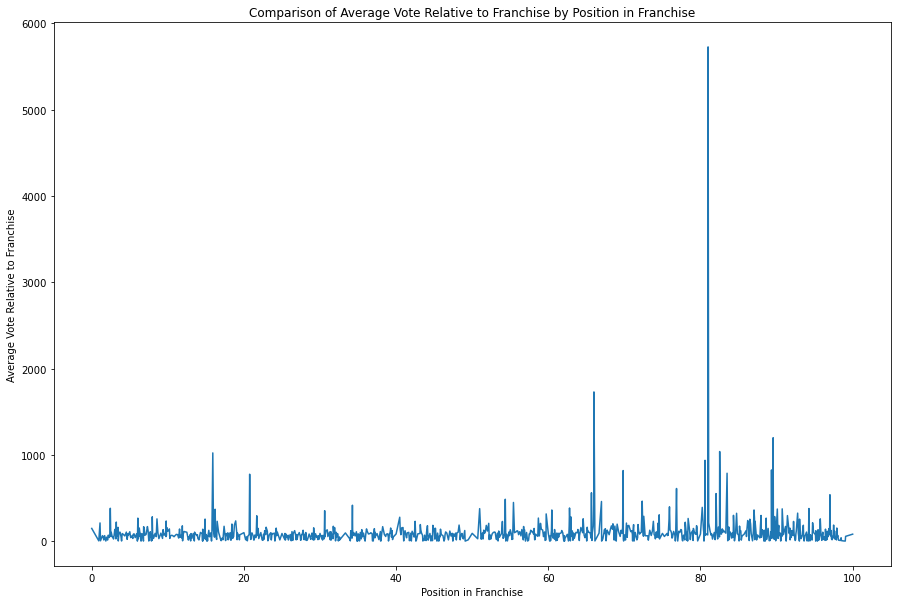

In [39]:
df_unmerged.groupby('position_in_franchise')['Vote_relative_to_franchise_average'].mean().plot(kind='line', figsize=(15,10))
plt.xlabel('Position in Franchise')
plt.ylabel('Average Vote Relative to Franchise')
plt.title('Comparison of Average Vote Relative to Franchise by Position in Franchise')
plt.show()

<AxesSubplot:xlabel='position_in_franchise', ylabel='Vote_relative_to_franchise_average'>

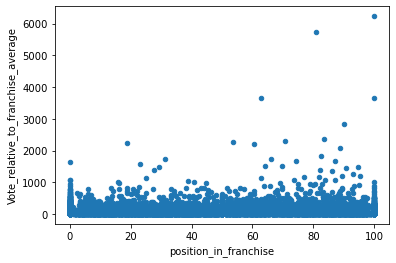

In [30]:
df_unmerged.plot.scatter("position_in_franchise", "Vote_relative_to_franchise_average")

## NEW DATAFRAME
Create a new dataframe with 1 entry per franchise. 

In [14]:
new_df = df_unmerged.sort_values('year').groupby('franchise_id').agg({
    'franchise_name' : 'first',
    'type': 'first',
    'rating': 'mean',
    'votes': 'mean',
    'franchise_count': 'first',
    'year': ['first', 'last']
})

In [15]:
new_df.sample()

franchise_name  type    rating  votes franchise_count  year      
                      first first      mean   mean           first first  last
franchise_id                                                                  
3025-1350              Cars  game  6.433333  384.0             6.0  2006  2017

In [25]:
def split_year(row):
    row['first_year'] = int(row['year']['first'])
    row['last_year'] = int(row['year']['last'])
    return row

new_df = new_df.apply(split_year, axis=1)
new_df = new_df[['franchise_name', 'type', 'rating', 'votes', 'franchise_count', 'first_year', 'last_year']]


In [32]:
new_df["franchise_length"] = new_df.apply(lambda row: row["last_year"] - row["first_year"] +1, axis = 1)

In [27]:
new_df.columns = new_df.columns.get_level_values(0)

In [28]:
new_df["franchise_length"].describe()


count    2014.000000
mean       15.173287
std        14.450913
min         0.000000
25%         5.000000
50%        11.000000
75%        21.000000
max       108.000000
Name: franchise_length, dtype: float64

In [34]:
new_df["frequency_of_releases"] = new_df.apply(lambda row: row["franchise_count"] / row["franchise_length"], axis = 1)

In [152]:
new_df[new_df['type']== 'game'].frequency_of_releases.describe()

count    1157.000000
mean        0.613475
std         0.506560
min         0.069767
25%         0.300000
50%         0.500000
75%         0.750000
max         5.000000
Name: frequency_of_releases, dtype: float64

In [153]:
new_df[new_df['type']== 'movie'].frequency_of_releases.describe()

count    857.000000
mean       0.676665
std        0.804700
min        0.031579
25%        0.235294
50%        0.428571
75%        0.777778
max        6.000000
Name: frequency_of_releases, dtype: float64

<AxesSubplot:xlabel='last_year', ylabel='frequency_of_releases'>

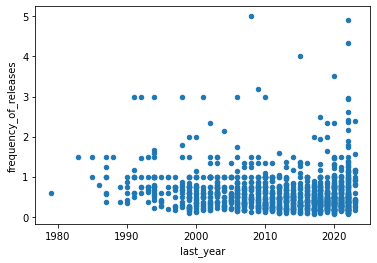

In [163]:
new_df[new_df['type']== 'game'].plot.scatter("last_year", "frequency_of_releases")

<AxesSubplot:xlabel='first_year', ylabel='frequency_of_releases'>

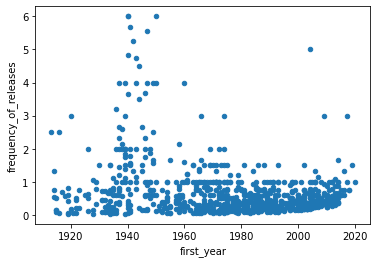

In [161]:
new_df[new_df['type']== 'movie'].plot.scatter("first_year", "frequency_of_releases")

<AxesSubplot:xlabel='franchise_count', ylabel='average_year_gap_per_release'>

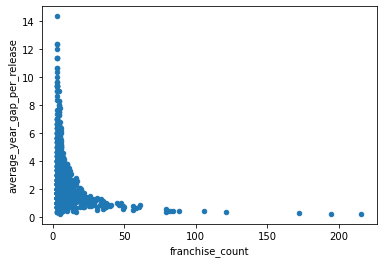

In [170]:
new_df[new_df['type']== 'game'].plot.scatter("franchise_count", "average_year_gap_per_release")

In [164]:
new_df["average_year_gap_per_release"] = new_df.apply(lambda row: row["franchise_length"] / row["franchise_count"], axis = 1)

In [174]:
new_df["average_year_gap_per_release"].describe()

count    2014.000000
mean        2.932124
std         2.742160
min         0.166667
25%         1.333333
50%         2.142857
75%         3.666667
max        31.666667
Name: average_year_gap_per_release, dtype: float64

In [173]:
new_df

,franchise_name,type,rating,votes,franchise_count,first_year,last_year,franchise_length,frequency_of_releases,franchise_count_bin,average_year_gap_per_release
franchise_id,,,,,,,,,,,
3025-1,Mario,game,6.771795,638.148718,195.0,1978,2022,45,4.333333,21+,0.230769
3025-10,Tony Hawk,game,6.680000,575.133333,15.0,1999,2020,22,0.681818,13-15,1.466667
3025-100,Commander Keen,game,7.137500,81.750000,8.0,1990,2001,12,0.666667,8,1.500000
3025-1000,Fate,game,7.590000,51.800000,10.0,2000,2021,22,0.454545,10,2.200000
3025-1008,Winx Club,game,7.600000,14.333333,6.0,2006,2014,9,0.666667,6,1.500000
...,...,...,...,...,...,...,...,...,...,...,...
f989,Inspector Hornleigh,movie,6.733333,254.666667,3.0,1939,1941,3,1.000000,3,1.000000
f99,The Conjuring Universe,movie,6.175000,188210.625000,8.0,2013,2021,9,0.888889,8,1.125000
f992,I soliti ignoti,movie,6.766667,4053.333333,3.0,1958,1985,28,0.107143,3,9.333333


In [171]:
df

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,franchise_count_bin
0,Mario,3025-1,game,tt0315808,Baseball,1978,0,NaN,"["" 'Family'"", ""['Sport'"", "" 'Baseball'"", "" 'Sp...",13.0,3.00,195.0,1.0,NaN,NaN,NaN,NaN,-3.808490,-0.253646,20+
1,Mario,3025-1,game,tt0176664,Donkey Kong,1981,0,NaN,"["" 'Platformer']"", ""['Action'""]",2011.0,7.40,195.0,1.0,3.0,1998.0,4.40,0.0,0.278200,0.593586,20+
2,Mario,3025-1,game,"tt0204287, tt3472820","Donkey Kong Junior, Donkey Kong",1982,0,NaN,"["" 'Family']"", "" 'Platformer'"", ""['Action'""]",170.5,6.50,195.0,2.0,1.0,-1840.5,-0.90,1.0,-0.557714,-0.186860,20+
3,Mario,3025-1,game,"tt0176971, tt0185909, tt0302501, tt2318635, tt...","Mario Bros., Baseball, Donkey Kong, Pinball, M...",1983,0,NaN,"[""['Sport'"", "" 'Baseball'"", ""['\\\\N']"", "" 'Pi...",326.8,6.00,195.0,5.0,1.0,156.3,-0.50,3.0,-1.022110,-0.120583,20+
4,Mario,3025-1,game,"tt0185017, tt0186168, tt3404206, tt3410580","Wrecking Crew, Golf, Mario Bros. Special, Punc...",1984,0,NaN,"["" 'Action'"", "" 'Sport'"", "" 'Platformer'"", ""['...",49.5,5.85,195.0,4.0,1.0,-277.3,-0.15,-1.0,-1.161429,-0.238169,20+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,Renato Castellani's Italian neorealism trilogy,f993,movie,tt0040018,it's forever springtime,1950,0,92,"['Comedy', 'Drama']",99.0,6.40,3.0,1.0,2.0,-212.0,-0.50,0.0,0.334048,-0.330841,3
11379,Renato Castellani's Italian neorealism trilogy,f993,movie,tt0044572,two cents worth of hope,1952,0,110,"['Comedy', 'Romance']",658.0,7.00,3.0,1.0,2.0,559.0,0.60,0.0,0.854707,-0.327767,3
11380,It's Alive,f994,movie,"tt0071198, tt0071675","the bat people, it's alive",1974,0,93,"['Romance', 'Horror', 'Sci-Fi']",5449.5,4.25,4.0,2.0,NaN,NaN,NaN,NaN,-1.531648,-0.301416,4
11381,It's Alive,f994,movie,tt0077756,it lives again,1978,0,91,"['Horror', 'Sci-Fi']",2494.0,5.20,4.0,1.0,4.0,-2955.5,0.95,-1.0,-0.707271,-0.317670,4


Now I have this, I can get the average rating and number of votes for each franchise, based on the number of elements in that franchise.

In [116]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 12.5, 15.5, 20.5, 250]
new_df['franchise_count_bin'] = pd.cut(new_df['franchise_count'],bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10", "11-12", "13-15", "16-20", "21+"])

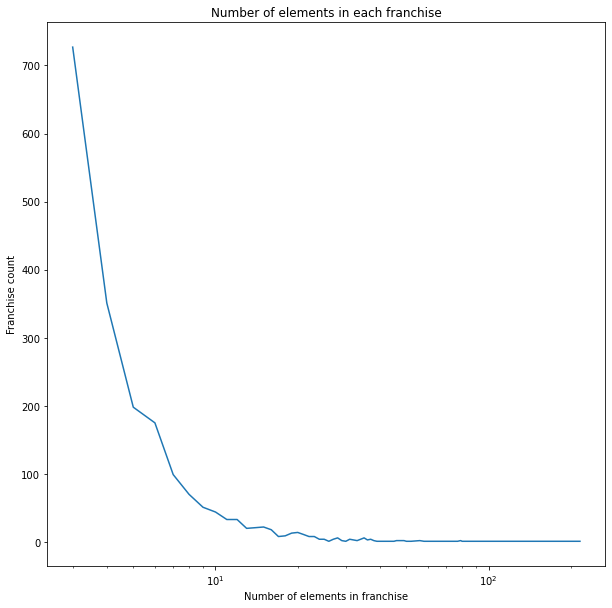

In [117]:
fig, ax = plt.subplots(figsize=(10,10))
new_df['franchise_count'].value_counts().sort_index().plot(title = "Number of elements in each franchise", xlabel = "Number of elements in franchise",ylabel = "Franchise count")
ax.set_xscale("log")

<AxesSubplot:title={'center':'Number of elements in each franchise'}, xlabel='Number of elements in franchise', ylabel='Number of franchises'>

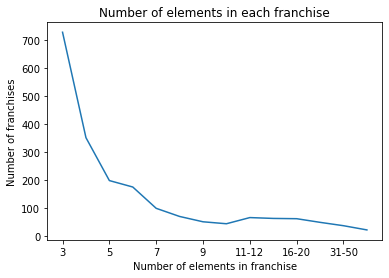

In [97]:
new_df['franchise_count_bin'].value_counts().sort_index().plot(title = "Number of elements in each franchise", xlabel = "Number of elements in franchise",ylabel = "Number of franchises")

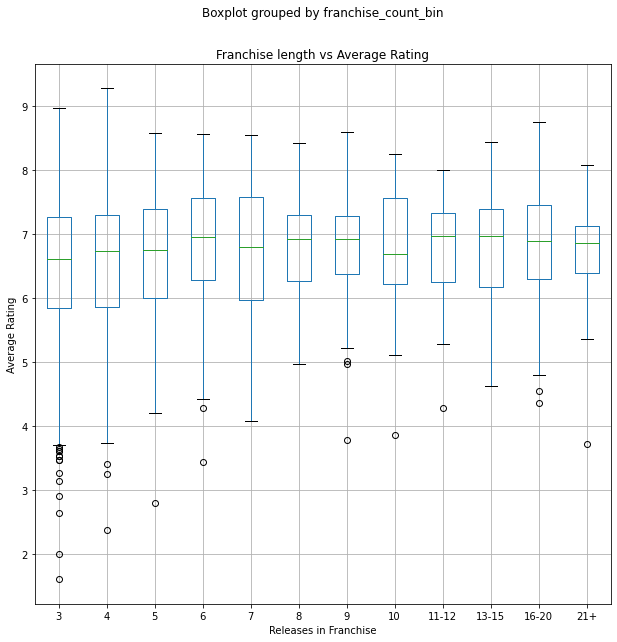

In [118]:
fig, ax = plt.subplots(figsize=(10,10))
new_df.boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

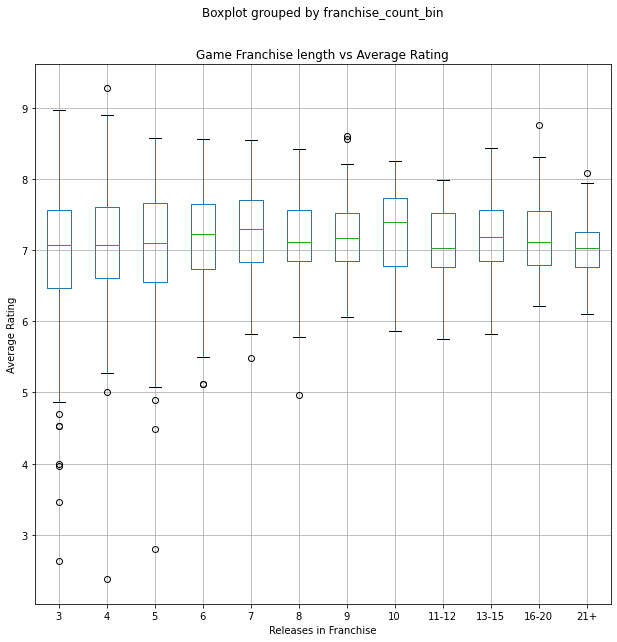

In [119]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="game"].boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Game Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

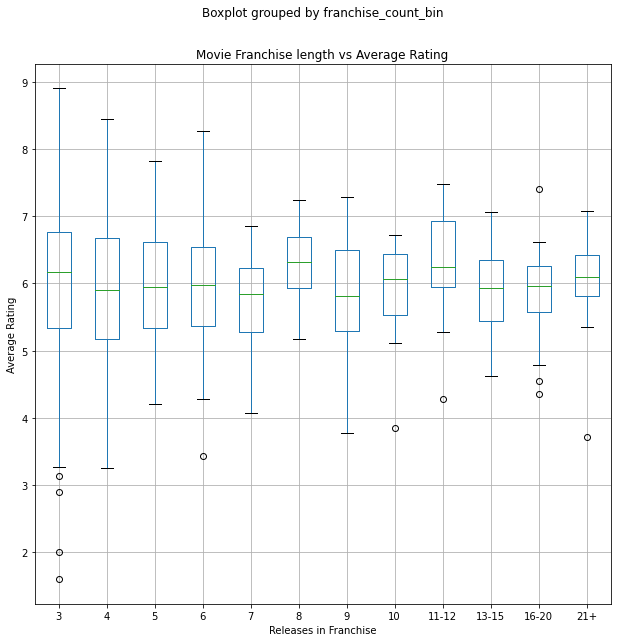

In [120]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="movie"].boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Movie Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

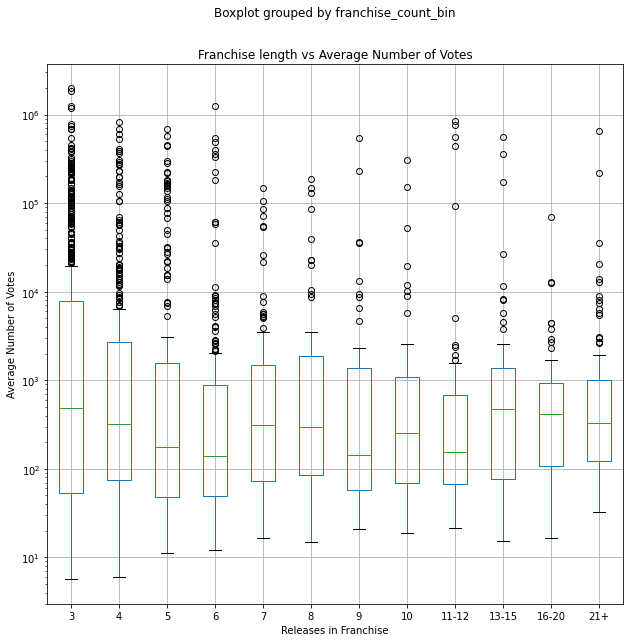

In [121]:
fig, ax = plt.subplots(figsize=(10,10))
new_df.boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

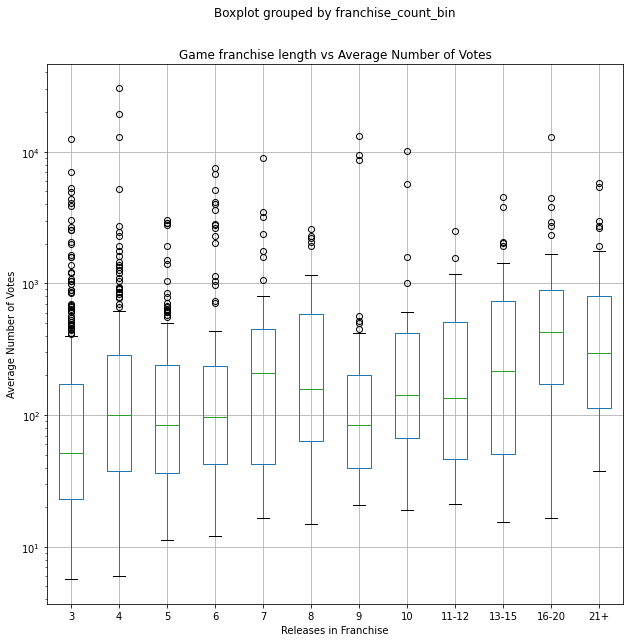

In [122]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="game"].boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Game franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

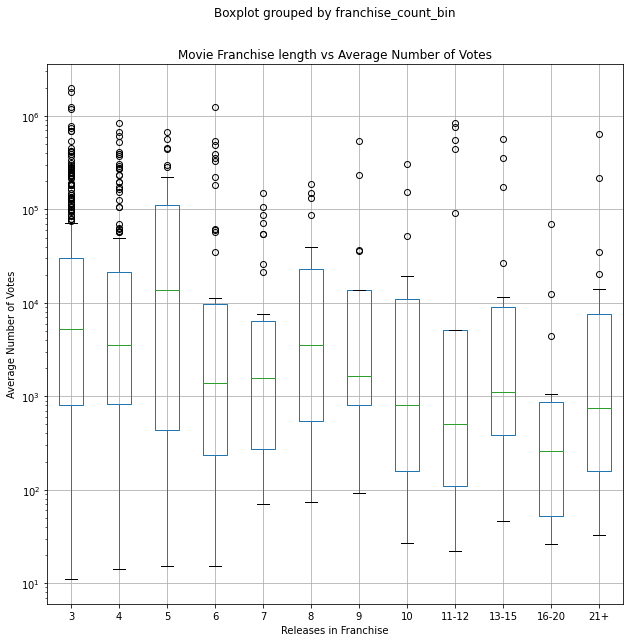

In [123]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="movie"].boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Movie Franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

<AxesSubplot:title={'center':'votes'}, xlabel='franchise_count_bin'>

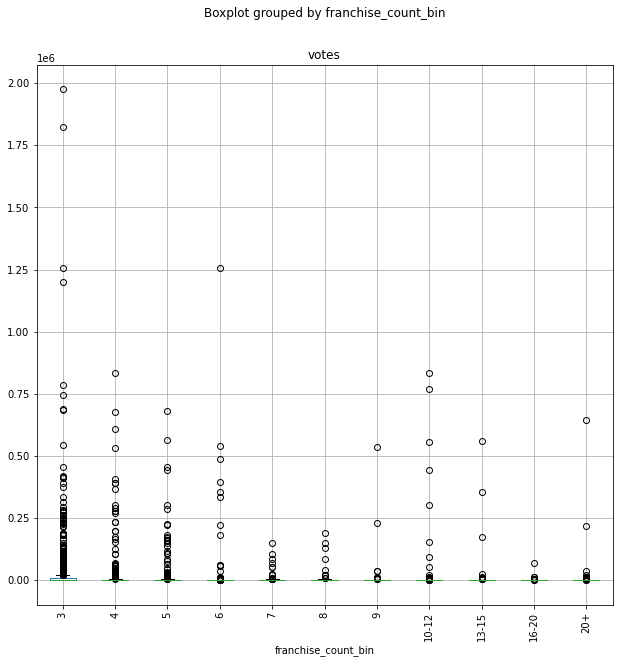

In [49]:
new_df.boxplot(by = "franchise_count_bin", column = ["votes"], rot = 90, figsize=(10,10))

In [125]:
df.sample()

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,franchise_count_bin
5815,Valkyrie Profile,3025-599,game,tt1322399,Valkyrie Profile: Covenant of the Plume,2008,0,NaN,"["" 'Strategy']"", "" 'Action'"", ""['\\\\N'"", "" 'R...",11.0,7.3,4.0,1.0,2.0,-104.0,-0.4,0.0,0.185321,-0.254494,4


In [49]:
# Merge the mean ratings back into the original DataFrame
df_unmerged = pd.merge(df_unmerged, df_unmerged.groupby("franchise_id")["rating"].mean().reset_index(), on="franchise_id", suffixes=("", "_franchise_overall"))

# Rename the new column to "franchise_overall_rating"
#df_unmerged = df_unmerged.rename(columns={"rating_mean": "franchise_overall_rating"})


#df_unmerged["franchise_overall_rating"] = df_unmerged.groupby("franchise_id")["rating"].mean()

In [61]:
df_unmerged.groupby('franchise_id')['rating_franchise_overall'].first().value_counts().sort_index()

1.600000    1
2.000000    1
2.375000    1
2.633333    1
2.800000    1
           ..
8.825000    1
8.866667    1
8.900000    3
8.966667    1
9.275000    1
Name: rating_franchise_overall, Length: 1037, dtype: int64

In [172]:
df.sample()

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,franchise_count_bin
10259,Homunculus,f612,movie,"tt0007240, tt0130005","homunculus, 4. teil - die rache des homunculus...",1917,0,68,"['\\N', 'Drama', 'Sci-Fi']",31.0,6.35,5.0,2.0,1.0,-18.333333,-0.116667,-1.0,0.29066,-0.331215,5


In [150]:
#bins =[1, 2.01, 3.01, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 12.5, 15.5, 20.5, 250]
df_unmerged['overall_franchise_rating_bins'] = pd.cut(df_unmerged['rating_franchise_overall'], bins=10)

KeyError: 'rating_franchise_overall'

In [149]:
df_unmerged.groupby('franchise_id')['overall_franchise_rating_bins'].first().value_counts().sort_index().plot(
    kind='bar', x='index', y='rating_franchise_overall', xlabel = "Number of releases", ylabel = "Number of franchises", legend=False)

KeyError: 'Column not found: overall_franchise_rating_bins'

In [61]:
df.sort_values("votes_average")

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,franchise_count_bins
893,The Adventures of Tintin,3025-1386,game,tt11587470,Tintin au Tibet,1995,0,NaN,""" Action-Adventure"","" Platformer"",""Adventure""",5.0,6.2,4.0,1.0,NaN,NaN,NaN,NaN,-0.836352,-0.257039,"(3.9, 4.9]"
3578,Gal Gun,3025-3335,game,tt3688036,Galgun,2011,0,NaN,"""Light-Gun Shooter"","" Action""",5.0,4.8,3.0,1.0,NaN,NaN,NaN,NaN,-2.136662,-0.257039,"(2.9, 3.9]"
492,X-COM,3025-120,game,tt15229276,X-COM: Apocalypse,1997,0,NaN,""" Action"","" Sci-Fi"","" Thriller"",""Strategy""",5.0,7.2,8.0,1.0,2.0,-66.0,-0.7,0.0,0.092441,-0.257039,"(7.9, 8.9]"
3700,BoxBoy!,3025-3471,game,tt9739766,Bye-Bye! BoxBoy!,2017,0,NaN,"""Puzzle"","" Platformer"","" Adventure""",5.0,7.6,3.0,1.0,2.0,-5.0,0.9,0.0,0.463959,-0.257039,"(2.9, 3.9]"
3936,The Jackbox Party Pack,3025-3716,game,tt26546575,The Jackbox Party Pack 5,2018,0,NaN,""" Minigame Collection"","" Trivia/Board Game"",""\...",5.0,7.8,5.0,1.0,2.0,-20.0,-0.1,0.0,0.649717,-0.257039,"(4.9, 5.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,The Godfather,f942,movie,tt0068646,the godfather,1972,0,175,"Crime,Drama",1896247.0,9.2,3.0,1.0,NaN,NaN,NaN,NaN,2.763791,10.096842,"(2.9, 3.9]"
10321,Middle-earth,f630,movie,tt0120737,the lord of the rings: the fellowship of the ring,2001,0,178,"Action,Adventure,Drama",1905459.0,8.8,6.0,1.0,NaN,NaN,NaN,NaN,2.416685,10.147503,"(5.9, 6.9]"
7433,The Lord of the Rings,f1045,movie,tt0120737,the lord of the rings: the fellowship of the ring,2001,0,178,"Action,Adventure,Drama",1905459.0,8.8,3.0,1.0,NaN,NaN,NaN,NaN,2.416685,10.147503,"(2.9, 3.9]"
9471,The Matrix,f406,movie,tt0133093,the matrix,1999,0,136,"Action,Sci-Fi",1945793.0,8.7,4.0,1.0,NaN,NaN,NaN,NaN,2.329908,10.369316,"(3.9, 4.9]"


In [49]:
df["z_votes"].describe()

count    1.138300e+04
mean    -1.754139e-17
std      1.000044e+00
min     -3.313579e-01
25%     -2.800044e-01
50%     -2.400771e-01
75%     -1.450921e-01
max      2.931764e+01
Name: z_votes, dtype: float64

<AxesSubplot:>

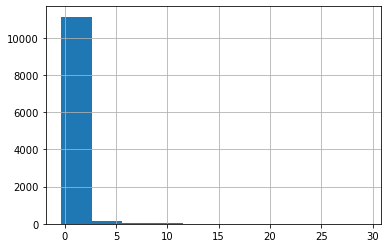

In [60]:
df.z_votes.hist()

(-4.0, 4.0)

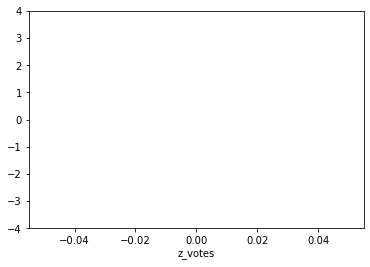

In [53]:
sns.lineplot(x = df["z_votes"])
plt.ylim(-4, 4)

<AxesSubplot:>

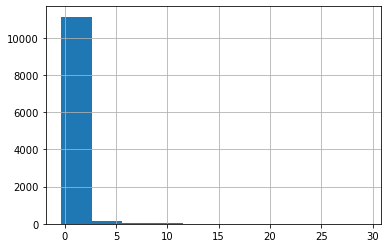

In [45]:
df.z_votes.hist()

In [69]:
df[df["type"]=="game"].franchise_id.nunique()

1157

In [64]:
df[df["type"]=="game"].franchise_count_bins.value_counts()

(12.9, 250.0]    2752
(2.9, 3.9]        938
(3.9, 4.9]        736
(5.9, 6.9]        657
(4.9, 5.9]        592
(6.9, 7.9]        383
(7.9, 8.9]        319
(8.9, 9.9]        270
(9.9, 10.9]       231
(10.9, 11.9]      217
(11.9, 12.9]      210
Name: franchise_count_bins, dtype: int64

<AxesSubplot:title={'center':'rating_average'}, xlabel='franchise_count_bins'>

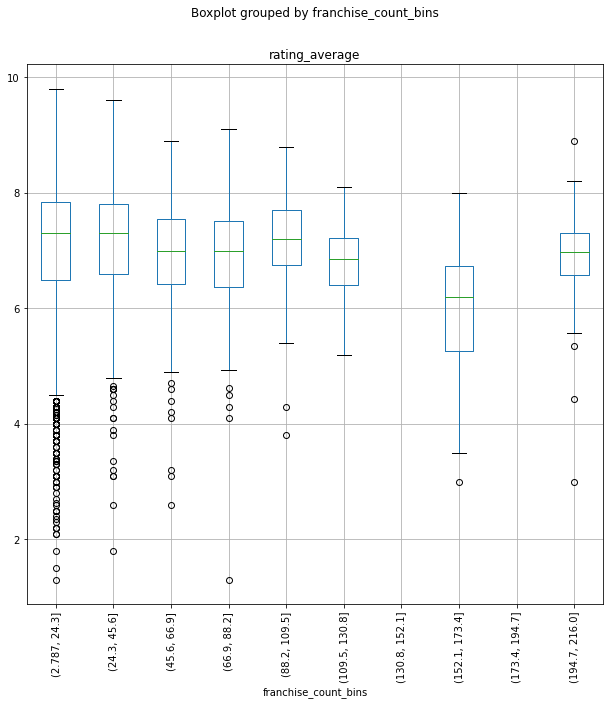

In [10]:
df[df["type"]=="game"].boxplot(by = "franchise_count_bins", column = ["rating_average"], rot = 90, figsize=(10,10))

In [ ]:
df.plot.bar(x = df.rating_average)

In [46]:
df.loc[df["type"] == "movie", 'z_rating'] = stats.zscore(df.loc[df["type"] == "movie", 'rating_average'])
df.loc[df["type"] == "game", 'z_rating'] = stats.zscore(df.loc[df["type"] == "game", 'rating_average'])
df.loc[df["type"] == "movie", 'z_votes'] = stats.zscore(df.loc[df["type"] == "movie", 'votes_average'])
df.loc[df["type"] == "game", 'z_votes'] = stats.zscore(df.loc[df["type"] == "game", 'votes_average'])

In [ ]:
df

Getting an overall picture of our data:

In [ ]:
df[df["type"] == "game"].votes_average.describe()

In [ ]:
df[df["type"] == "movie"].votes_average.describe()

In [ ]:
df.rating_average.describe()

In [ ]:
#df.groupby("type").year_diff.boxplot(rot = 90)
#df.groupby("type")[["year_diff"]].boxplot(rot=90)
df.groupby("type").plot(kind="box", rot=90)


In [ ]:
The average re

In [ ]:
df[df["type"]== "movie"]